In [ ]:
# %load_ext watermark
# %watermark -v -p sklearn,numpy,scipy,matplotlib

# %matplotlib inline
# from preamble import *

# repr() <VS> str()
# str() 은 사용자가 보기좋은 형태로 변환하여 출력
# repr() 은 해당 메소드가 제공하는 결과물 그대로 출력

# **텍스트 데이터 다루기 (문자열 데이터 타입)**
**1 IMDB 영화 리뷰 감성 분석**

In [1]:
# !은 셸(shell) 명령을 실행해주는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해 하위 폴더의 목록을 
# 볼 수 있습니다. 윈도에서는 !tree data/aclImdb 와 같이 사용하세요.
# !tree -dL 2 data/aclImdb
!find ./data -type d
# !rm -r data/aclImdb/train/unsup

./data
./data/aclImdb
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg


In [2]:
# 텍스트와 레이블을 포함하고 있는 IMDB Bunch 오브젝트를 반환합니다.
import numpy as np
from sklearn.datasets import load_files
reviews_train       = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("<text_train 타입> : {}\n<ex) text_train[6]> : \n{}".format(
    type(text_train),  text_train[6]))

# 전처리 : 문장 내 <br /> 부분을 삭제합니다
text_train        = [doc.replace(b"<br />", b" ") for doc in text_train]
reviews_test      = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test         = [doc.replace(b"<br/>", b" ")  for doc in text_test]
p_text = "<(train) 문서 수> : {:,}\n<(train) 0, 1 샘플 수> : {}\n<(test) 문서 수> : {:,}\n<(test) 0, 1 샘플 수> : {}"
print(p_text.format(
    len(text_train), np.bincount(y_train), len(text_test), np.bincount(y_test)))

<text_train 타입> : <class 'list'>
<ex) text_train[6]> : 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."
<(train) 문서 수> : 25,000
<(train) 0, 1 샘플 수> : [12500 12500]
<(test) 문서 수> : 25,000
<(test) 0, 1 샘플 수> : [12500 12500]


## **1 텍스트 데이터를 BOW로 표현하기**
### 1) 샘플 데이터에 BOW 적용하기

In [3]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

# 단어벡터 생성
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)
bag_of_words = vect.transform(bards_words)
p_text = "<어휘사전 크기> : {}\n<어휘사전 내용> :\n {}\n<BOW> : {}\n<BOW 밀집 표현> :\n{}"
print(p_text.format(
    len(vect.vocabulary_), vect.vocabulary_,
    repr(bag_of_words),bag_of_words.toarray()))

<어휘사전 크기> : 13
<어휘사전 내용> :
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
<BOW> : <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>
<BOW 밀집 표현> :
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 2-1) 영화 리뷰에 대한 BOW

In [4]:
%%time
vect          = CountVectorizer().fit(text_train)
X_train       = vect.transform(text_train)
feature_names = vect.get_feature_names()
p_text    = "<X_train> :\n{}\n<특성의 갯수> : {}\n<처음 20개 특성> :\n{}\n<20010~20030 특성> :\n{}\n<매 2000번째 특성> :\n{}"
print(p_text.format(repr(X_train), len(feature_names), feature_names[:20], 
                    feature_names[20010:20030], feature_names[::2000]))

<X_train> :
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>
<특성의 갯수> : 74849
<처음 20개 특성> :
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
<20010~20030 특성> :
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
<매 2000번째 특성> :
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkm

In [5]:
%%time
# 로지스틱회귀를 활용한 훈련모델의 평균점수
from sklearn.model_selection import cross_val_score
from sklearn.linear_model    import LogisticRegression
scores = cross_val_score(LogisticRegression(solver='liblinear'), 
                         X_train, y_train, cv=5)
print("크로스 밸리데이션 평균 점수: {:.2f}".format(np.mean(scores)))

크로스 밸리데이션 평균 점수: 0.88
CPU times: user 27.4 s, sys: 47.5 ms, total: 27.5 s
Wall time: 27.5 s


In [17]:
%%time
# GridSearchCV 를 활용한 최적의 파라미터 계산
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(
    LogisticRegression(solver = 'liblinear'), 
    param_grid, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)

X_test = vect.transform(text_test)
p_text = "최적의 매개변수 : {}\n최상의 크로스 밸리데이션 점수 : {:.2f}\n테스트 점수 : {:.2f}\n"
print(p_text.format(
    grid.best_params_, 
    grid.best_score_, 
    grid.score(X_test, y_test)))

최적의 매개변수 : {'C': 0.1}
최상의 크로스 밸리데이션 점수 : 0.88
테스트 점수 : 0.87



### 2-2) min_df = 5 
min_df : 최소 5번 이상 등장한 Token을 대상

In [18]:
# min_df=5 로 제한후 모델의 훈련
vect          = CountVectorizer(min_df=5).fit(text_train)
X_train       = vect.transform(text_train)
feature_names = vect.get_feature_names()
print("""<min_df로 제한한 X_train :> {}\n<First 50 features :>\n{}
<Features 20010 to 20030 :>\n{}\n<Every 700th feature :>\n{}""".format(
    repr(X_train), 
    feature_names[:50], 
    feature_names[20010:20030], 
    feature_names[::700]))

<min_df로 제한한 X_train :> <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>
<First 50 features :>
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
<Features 20010 to 20030 :>
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
<Every 700th feature :>
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer'

In [8]:
%%time
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수 : {:.2f}".format(grid.best_score_))

최적의 크로스 밸리데이션 점수: 0.89
CPU times: user 5.15 s, sys: 88.1 ms, total: 5.24 s
Wall time: 50.5 s


## **2 StopWord**
- **불용어를 제거한 후** 나머지를 활용하여 분석합니다
- 하지만 불용어 제거 후 분석결과 **성능개선은 거의 없었다**

In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 10번째 불용어:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

불용어 개수: 318
매 10번째 불용어:
['anything', 'amoungst', 'whereafter', 'him', 'back', 'who', 'neither', 'me', 'this', 'whole', 'to', 'few', 'con', 'mill', 'were', 'whether', 'done', 'show', 'anyone', 'twelve', 'but', 'eleven', 'too', 'or', 'always', 'nobody', 'into', 'why', 'somehow', 'any', 'several', 'already']


In [10]:
%%time
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
p_text = "불용어가 제거된 X_train:\n{}\n최상의 크로스 밸리데이션 점수: {:.2f}"
print(p_text.format(repr(X_train), grid.best_score_))

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>
최상의 크로스 밸리데이션 점수: 0.88
CPU times: user 10.1 s, sys: 72.3 ms, total: 10.1 s
Wall time: 25.4 s


In [11]:
%%time
from sklearn.pipeline import make_pipeline
pipe       = make_pipeline(CountVectorizer(),
                           LogisticRegression(solver = 'liblinear'))
param_grid = {'countvectorizer__max_df' : [100, 1000, 10000, 20000], 
              'logisticregression__C'   : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
p_text = "<최고 크로스 밸리데이션 점수> : {:.2f}\n<최적의 파라미터> : {}\n<CounterVector 단어수> : {:,}"
print(p_text.format(grid.best_score_, 
                    grid.best_params_,
                    len(grid.best_estimator_.named_steps['countvectorizer'].vocabulary_)))

<최고 크로스 밸리데이션 점수> : 0.89
<최적의 파라미터> : {'countvectorizer__max_df': 20000, 'logisticregression__C': 0.1}
<CounterVector 단어수> : 74,840
CPU times: user 9.77 s, sys: 1.93 s, total: 11.7 s
Wall time: 7min 41s


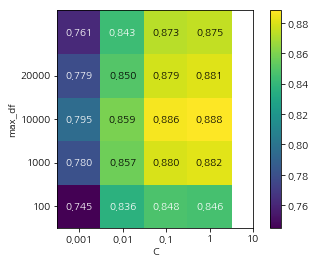

In [12]:
%matplotlib inline
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family=['NanumGothic','Malgun Gothic'])

# 히트맵을 그립니다
scores  = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="max_df", cmap="viridis", fmt="%.3f",
    xticklabels = param_grid['logisticregression__C'],
    yticklabels = param_grid['countvectorizer__max_df'])
plt.colorbar(heatmap)

## **3 tf–idf로 데이터 스케일 변경**
- 완전한 비지도 학습이므로 성능에는 크게 영향을 주지 않습니다
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}

In [19]:
%matplotlib inline
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family=['NanumGothic','Malgun Gothic'])
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model    import LogisticRegression

In [20]:
%%time
# 그리드서치를 활용하여 최적의 파라미터를 분석합니다
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe       = make_pipeline(TfidfVectorizer(min_df = 5), 
                           LogisticRegression(solver = 'liblinear'))
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}
grid       = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print("<최고 크로스 밸리데이션 점수> : {:.2f}".format(grid.best_score_))

<최고 크로스 밸리데이션 점수> : 0.89
CPU times: user 5.94 s, sys: 493 ms, total: 6.44 s
Wall time: 1min 43s


In [21]:
vectorizer      = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train         = vectorizer.transform(text_train)      # 훈련 데이터셋을 변환
max_value       = X_train.max(axis=0).toarray().ravel() # 특성별 가장 큰 값
sorted_by_tfidf = max_value.argsort()                   # 특성 이름을 구합니다
sorted_by_idf   = np.argsort(vectorizer.idf_)
feature_names   = np.array(vectorizer.get_feature_names())
p_text = "<가장 낮은 tfidf 특성> :\n{}\n<가장 높은 tfidf 특성> :\n{}\n<가장 낮은 idf를 가진 특성> :\n{}"
print(p_text.format(
    feature_names[sorted_by_tfidf[:20]], 
    feature_names[sorted_by_tfidf[-20:]],
    feature_names[sorted_by_idf[:100]]))  # 일반적으로 많이 사용되는 단어

<가장 낮은 tfidf 특성> :
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
<가장 높은 tfidf 특성> :
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']
<가장 낮은 idf를 가진 특성> :
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will'

분석 객체수 : 1
객체내 갯수 : 27,271


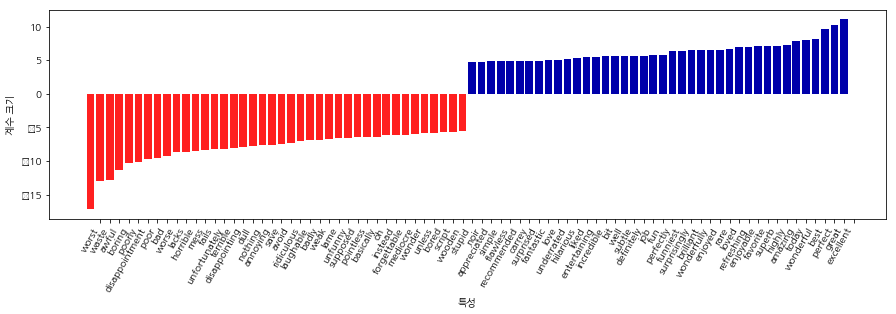

In [22]:
# 모델 계수 조사
result_tfidf = grid.best_estimator_.named_steps["logisticregression"].coef_
print("분석 객체수 : {}\n객체내 갯수 : {:,}".format(len(result_tfidf), len(result_tfidf[0])))

# 상위 25개, 하위 25개 결과를 출력합니다
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0], # Token의 tf-idf 값
    feature_names,                                                   # Token의 words 목록
    n_top_features = 40)

## **4 n-grams 를 활용한 BOW**

In [34]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
p_text = "bards_words 원본:{}\n어휘사전 갯수 : {}\n어휘사전 :{}"
print(p_text.format(
    bards_words,
    len(cv.vocabulary_),
    cv.get_feature_names()))

bards_words 원본:['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']
어휘사전 갯수 : 13
어휘사전 :['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [44]:
# min_num, max_num 값이 동일하면 n-grams만 생성
# CountVectorizer(ngram_range=(min_num, max_num))
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
p_text = "<bi-grams 어휘사전 갯수>: {}\n<bi-grams 어휘사전>:\n{}\n<bi-grams 밀집배열>:\n{}"
print(p_text.format(
    len(cv.vocabulary_),
    cv.get_feature_names(),
    cv.transform(bards_words).toarray()))

<bi-grams 어휘사전 갯수>: 14
<bi-grams 어휘사전>:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']
<bi-grams 밀집배열>:
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [50]:
# min_num, max_num 값이 다르면 uni-grams ~ tri-grams 까지 생성
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
p_text = "<uni~tri 어휘사전 크기>: {}\n<uni~tri 어휘사전>: {}\n"
print(p_text.format(
    len(cv.vocabulary_),
    cv.get_feature_names()))

<uni~tri 어휘사전 크기>: 39
<uni~tri 어휘사전>: ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']



In [51]:
%%time
# 매개변수 조합이 많고 uni-grams ~ Tri-grams 모두를 학습하여
# 그리드 서치 실행에 시간이 오래 걸립니다
pipe = make_pipeline(
    TfidfVectorizer(min_df=5), 
    LogisticRegression(solver='liblinear'))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}\n최적의 매개변수:\n{}".format(
    grid.best_score_,
    grid.best_params_))

최상의 크로스 밸리데이션 점수: 0.91
최적의 매개변수:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}
CPU times: user 49.5 s, sys: 2.96 s, total: 52.5 s
Wall time: 19min 40s


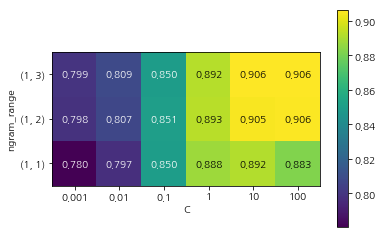

In [52]:
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22, 22)

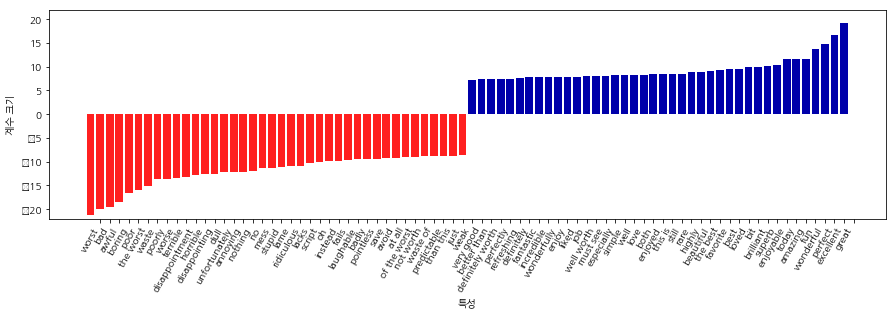

In [53]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

(-22, 22)

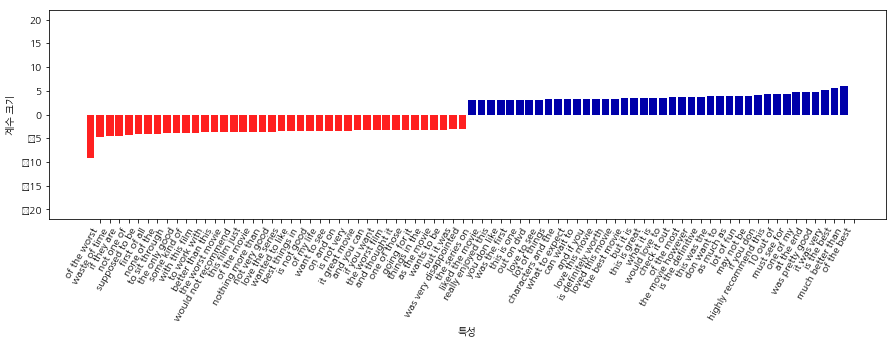

In [54]:
# Tri-grams 의 특성을 찾고 그래프로 나타냅니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

## **5 Spacy 를 활용한 고급 토큰화, 어간 추출, 표제어 추출**
```
pip install spacy
python -m spacy download en
```
- CountVectorizer(정규식 토큰 분할기)에 spacy 표제어를 활용
- en_nlp.tokenizer(spacy 토큰 분할기)를 정규식 기반으로 바꿉니다

In [56]:
# spacy의 표제어 추출과 nltk의 어간 추출을 비교
import spacy, nltk
def compare_normalization(doc):
    en_nlp    = spacy.load('en')          # spacy
    stemmer   = nltk.stem.PorterStemmer() # nltk's PorterStemmer
    doc_spacy = en_nlp(doc)
    print("<spacy 표제어>:\n{}\n<nltk 어간>:\n{}".format(
        [token.lemma_ for token in doc_spacy],                     
        [stemmer.stem(token.norm_.lower()) for token in doc_spacy]))

compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

<spacy 표제어>:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
<nltk 어간>:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [62]:
%%time
import re
regexp = re.compile('(?u)\\b\\w\\w+\\b')
en_nlp = spacy.load('en')  # spacy의 언어 모델을 호출

# spacy 파이프라인
from spacy.tokens import Doc
def custom_tokenizer(document):
    doc = Doc(en_nlp.vocab, words=regexp.findall(document))
    return [token.lemma_ for token in doc]

lemma_vect    = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)
X_train_lemma = lemma_vect.fit_transform(text_train) # text_train의 변환
print("X_train_lemma.shape : {}".format(X_train_lemma.shape))

# 비교를 위한 표준 CountVectorizer를 사용
vect    = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape : {}".format(X_train.shape))

X_train_lemma.shape : (25000, 20660)
X_train.shape : (25000, 27271)
CPU times: user 30.6 s, sys: 153 ms, total: 30.8 s
Wall time: 30.6 s


In [69]:
%%time
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
# train_size=0.01 훈련 세트의 1%만 사용
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)       # 기본 CountVectorizer 그리드 서치
grid.fit(X_train_lemma, y_train) # 표제어를 사용해서 그리드 서치를 수행
p_text = "최상의 크로스 밸리데이션 점수 (기본 CountVectorizer): {:.3f}\n" +\
         "최상의 크로스 밸리데이션 점수 (표제어): {:.3f}"
print(p_text.format(grid.best_score_, grid.best_score_))

최상의 크로스 밸리데이션 점수 (기본 CountVectorizer): 0.729
최상의 크로스 밸리데이션 점수 (표제어): 0.729
CPU times: user 12.3 s, sys: 234 ms, total: 12.5 s
Wall time: 13.1 s


## **6 토픽 모델링과 문서 군집화**
LDA는 확률적 알고리즘으로 random_state=0 값에 따라 결과를 다르게 출력합니다.

In [72]:
%%time
vect = CountVectorizer(max_features=10000, max_df=.15)
X    = vect.fit_transform(text_train)

# 10개의 토픽으로 모델을 학습
from sklearn.decomposition import LatentDirichletAllocation
lda  = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                 max_iter=25, random_state=0)
document_topics = lda.fit_transform(X) # 모델 생성과 변환을 한 번에 실행
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [73]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting       = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names()) # CountVectorizer 에서 특성이름 추출
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, # 10개의 토픽
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [74]:
%%time
# 100개의 토픽으로 새로운 모델을 학습한 뒤, 20개를 출력합니다
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)
topics  = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [75]:
# 토픽 45의 가중치를 활용하여 정렬합니다 (비중이 높은 5개를 출력)
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]: 
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n") # 첫 두 문장을 출력

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

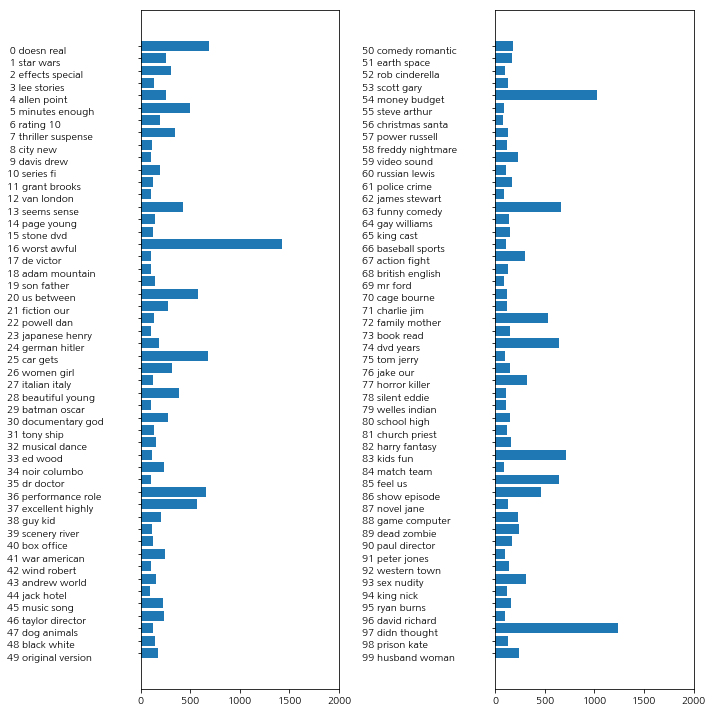

In [76]:
fig, ax     = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end   = (col + 1) * 50
    ax[col].barh(np.arange(50), 
                 np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()